## about the problem statement

# 3.2 problem statement

* build a sentiment analysis model to analyze customer reviews and feedback for a hospity company the model should be able to classify reviews as positive,negative or negitive or neutral and identify key topics or areas of concern

# Objective
* Create a machine learning solution capable of categorizing hospitality reviews into sentiment classes and extracting significant topics, facilitating informed decision-making and service enhancement.

* about the columns-

* 1.Index: A unique identifier for each review entry.
    
* 2.Name: The name of the hotel that was reviewed.
    
* 3.Area: The geographic area or city where the hotel is located.
    
* 4.Review Date: The date when the review was posted.
    
* 5.Rating Attribute: The aspect or attribute of the hotel being rated.
    
* 6.Rating (Out of 10): A numerical rating given by the reviewer for the specific attribute.
    
* 7.Review Text: The text of the review written by the guest.

# import libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [24]:
pip install  nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import string
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import autocorrect
from nltk.stem import PorterStemmer,WordNetLemmatizer
from tqdm import tqdm

# loading the dataset

In [109]:
df=pd.read_csv(r"C:\Users\HOME\Downloads\archive (23)\tripadvisor_hotel_reviews.csv")

In [110]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


# info the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [8]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


# data cleaning

In [9]:
df.shape

(20491, 2)

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [13]:
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 0


In [14]:
rows = df.shape[0] 
cols = df.shape[1] 
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))

Rows   : 20491
Columns: 2


In [15]:
print('Numerical features ','\n')
df.describe(exclude=['O'])

Numerical features  



,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [16]:
df.nunique()

Review    20491
Rating        5
dtype: int64

# explore data analysis

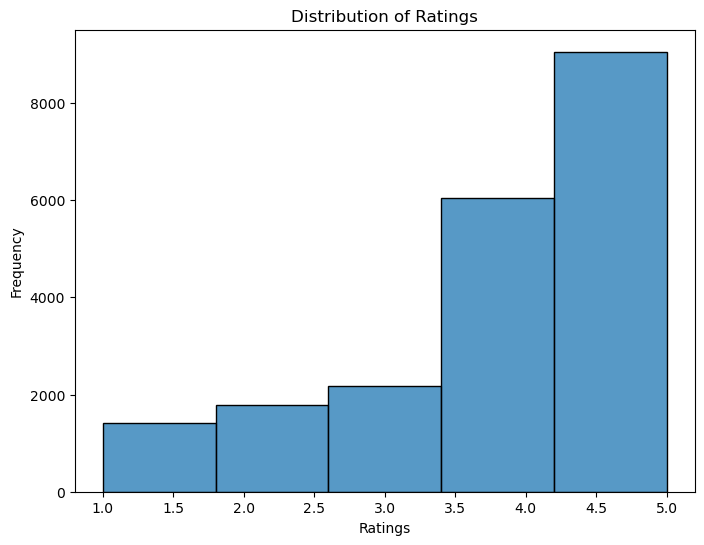

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

* there are more rating from 4 to 5 comapred to other ratings

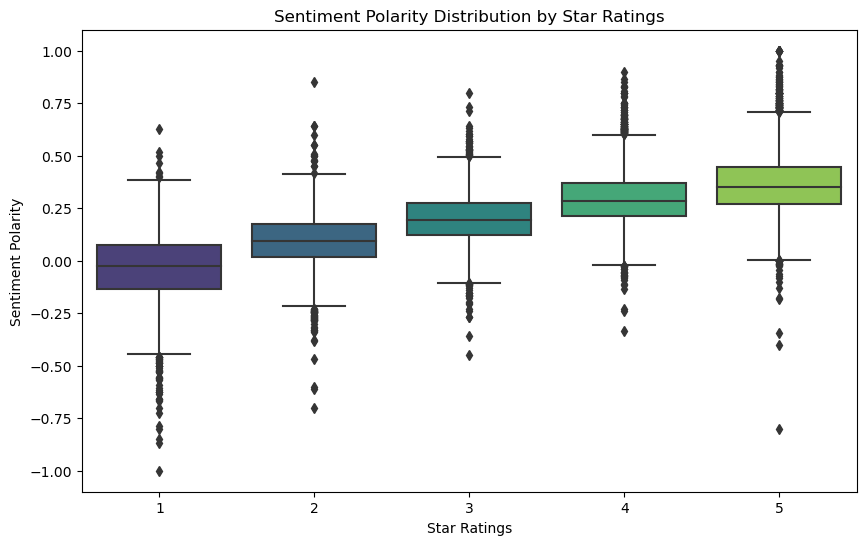

In [21]:
from textblob import TextBlob

df['Sentiment_Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10,6))
sns.boxplot(x='Rating', y='Sentiment_Polarity', data=df, palette='viridis')
plt.title('Sentiment Polarity Distribution by Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Sentiment Polarity')
plt.show()

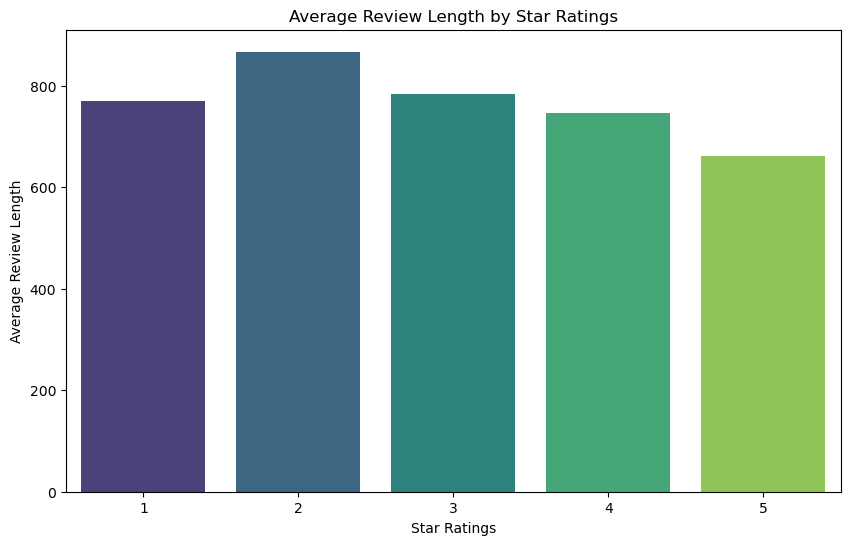

In [22]:
df['Review_Length'] = df['Review'].apply(len)

avg_review_length = df.groupby('Rating')['Review_Length'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Rating', y='Review_Length', data=avg_review_length, palette='viridis')
plt.title('Average Review Length by Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Average Review Length')
plt.show()

* we can observe there are more negtive ratings compared to postive ratings 

In [27]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
from wordcloud import wordcloud

In [36]:
from wordcloud import WordCloud
positive_reviews = " ".join(review for review in df[df['Rating'] >= 4].Review)
neutral_reviews = " ".join(review for review in df[df['Rating'] == 3].Review)
negative_reviews = " ".join(review for review in df[df['Rating'] <= 2].Review)

positive_wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='green').generate(positive_reviews)
neutral_wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='orange').generate(neutral_reviews)
negative_wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='red').generate(negative_reviews)


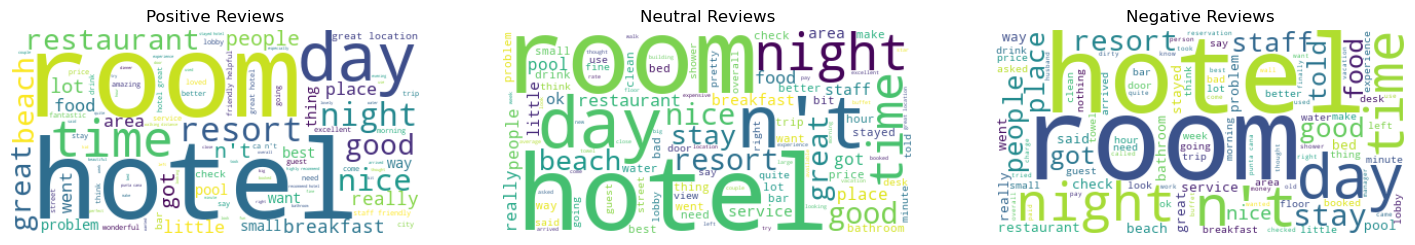

In [37]:
plt.figure(figsize=(18,12))

plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Reviews')

plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

plt.show()

# sentiment  analysis on text data

In [43]:
def get_sentiment_nltk(rating):
    if rating >= 4:
        return 'Positive'
    elif rating < 3:
        return 'Negative'
    else:
        return 'Neutral'

In [44]:
df['Sentiment'] = df['Rating'].apply(get_sentiment_nltk)

In [45]:
df

,Review,Rating,Sentiment_Polarity,Review_Length,Sentiment
0,nice hotel expensive parking got good deal sta...,4,0.208744,593,Positive
1,ok nothing special charge diamond member hilto...,2,0.214923,1689,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,0.294420,1427,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,0.504825,600,Positive
4,"great stay great stay, went seahawk game aweso...",5,0.384615,1281,Positive
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,0.221729,733,Positive
20487,great location price view hotel great quick pl...,4,0.503704,306,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,0.171220,443,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1,0.122573,5557,Negative


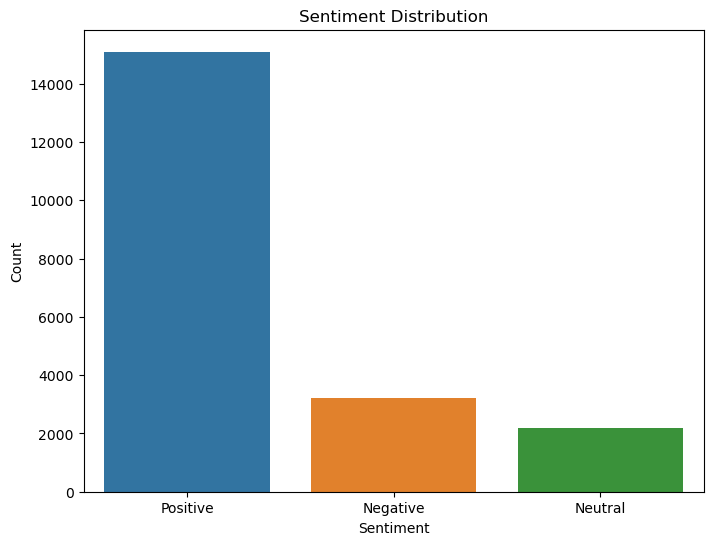

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

* there are more positive reviews compared to negitive and neutral

C:\Users\HOME\AppData\Local\Temp\ipykernel_11976\3011918728.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


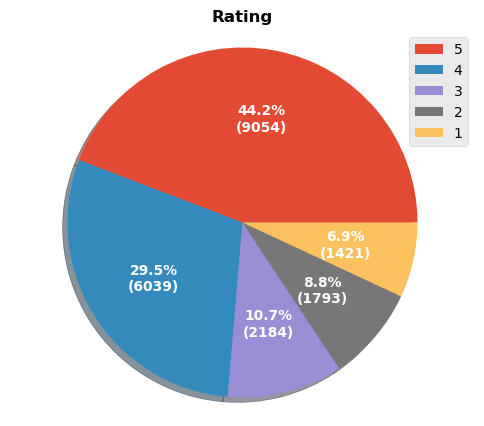

In [49]:
plt.style.use('ggplot')

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

fig,ax = plt.subplots(figsize = (6,5))
df_class = df['Rating'].value_counts().to_frame()
labels = df_class.index
values = df_class.iloc[:,0].to_list()
ax.pie(x = values, labels = labels, autopct = autopct_fun(values), shadow = True, textprops = {'color':'white', 'fontsize':10, 'fontweight':'bold'})
ax.legend(labels, loc = 'best')
ax.set_title('Rating', fontsize = 12, fontweight = "bold", color = "black")
ax.axis('equal')

fig.show()

* 5 star rating is more  comapred to other ratings
* 5star-44.2%(9054)
* 4 star -29.5%(6039)
* 3 star -10.7%(2184)
* 2star-8.8%(1793)
* 1 star-6.9%(1421)

# text data

In [56]:
df["Sentiment"].value_counts(normalize=True)

Positive    0.736567
Negative    0.156849
Neutral     0.106583
Name: Sentiment, dtype: float64

In [58]:
df.loc[0,"Review"]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [59]:
sentiment_mapping = {'Positive': 1, 'Negative': 0,'Neutral':2}
df['Sentiment_numeric'] = df['Sentiment'].map(sentiment_mapping)
print(df[['Sentiment', 'Sentiment_numeric']].head())

  Sentiment  Sentiment_numeric
0  Positive                  1
1  Negative                  0
2   Neutral                  2
3  Positive                  1
4  Positive                  1


# idetify  the input and output

In [61]:
X = df.Review 
y = df.Sentiment_numeric
print(X.shape, y.shape)

(20491,) (20491,)


# spliting the data into train and test split 

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15368,) (15368,)
(5123,) (5123,)


# data pre prepartion on train(x_train)

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

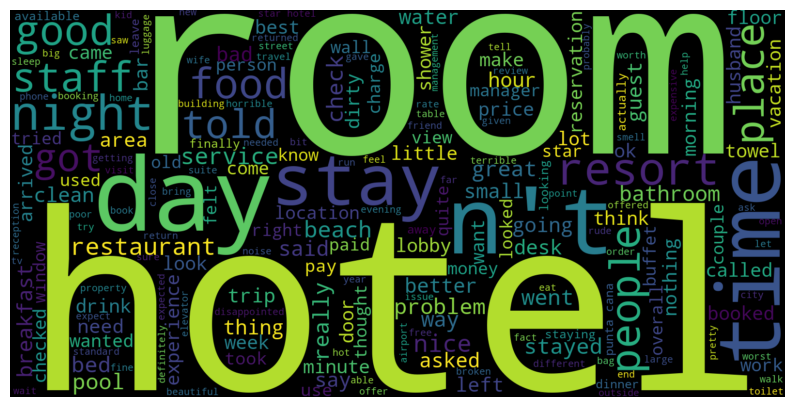

In [66]:
from wordcloud import WordCloud
#Negative Reviews
# Function to display word cloud
def display_wordcloud(data):
    wc = WordCloud(background_color='black', width=1600, height=800).generate(' '.join(data))

    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

display_wordcloud(X_train[y_train ==0])


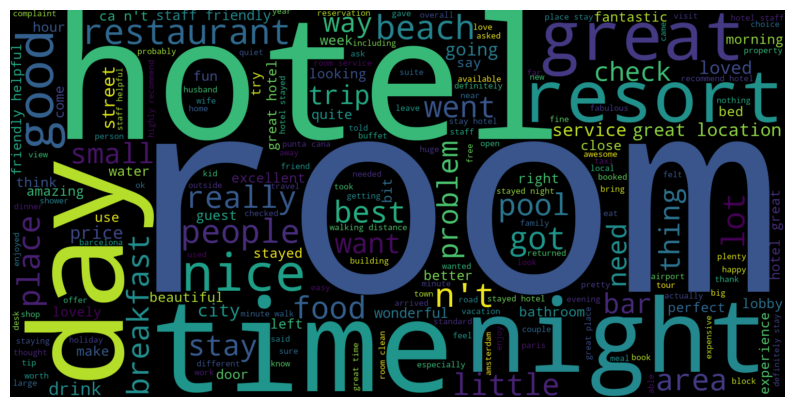

In [68]:
display_wordcloud(X_train[y_train ==1])

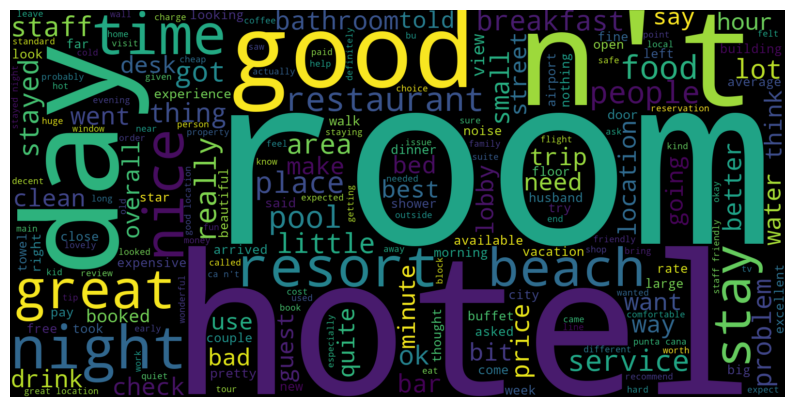

In [70]:
display_wordcloud(X_train[y_train ==2])

In [73]:
import string
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [75]:
import nltk

In [77]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [78]:
def clean(doc): # doc is a string of text
    # This text contains a lot of <br/> tags.
    doc = doc.replace("</br>", " ")
    
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(filtered_tokens)

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(preprocessor=clean)
%time X_train_dtm = vect.fit_transform(X_train)
print(X_train_dtm.shape)

CPU times: total: 56 s
Wall time: 1min 3s
(15368, 59848)


# data pre prepartion on train(x_test)

In [80]:
X_test_dtm = vect.transform(X_test)
print(X_test_dtm.shape)

(5123, 59848)


# building  a model

In [84]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


In [85]:
nb = MultinomialNB() 
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 15.6 ms
Wall time: 53 ms


MultinomialNB()

# evaluate the traning model

In [86]:
import sklearn

In [87]:
from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.8925689744924519

In [88]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 1983,   373,    10],
       [   94, 11232,    14],
       [  155,  1005,   502]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

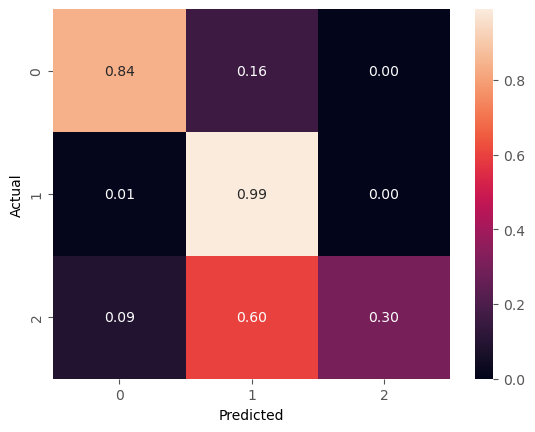

In [89]:
cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')


# evaluate the test model

In [90]:
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.8465742728869803

Text(0.5, 23.52222222222222, 'Predicted')

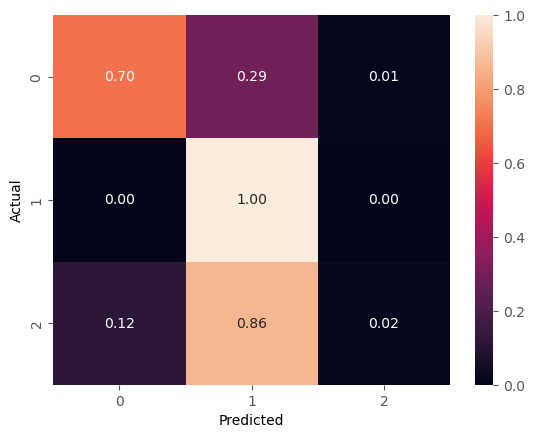

In [91]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')


In [92]:
print("Train Score (accuracy_score):", metrics.accuracy_score(y_train, y_train_pred))
print("Test Score (accuracy_score):", metrics.accuracy_score(y_test, y_test_pred))

Train Score (accuracy_score): 0.8925689744924519
Test Score (accuracy_score): 0.8465742728869803


In [93]:
# Improving the efficiency by applying cleaning the text data before hand

%time X_train_clean = X_train.apply(lambda doc: clean(doc))

CPU times: total: 48.4 s
Wall time: 53.7 s


In [94]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: total: 14.4 s
Wall time: 15.3 s


# pip line building

In [98]:
from sklearn.metrics import accuracy_score
import os
import joblib
from joblib import Memory
import warnings
warnings.filterwarnings('ignore')

In [101]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 99.8/99.8 MB 547.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [102]:
from xgboost import XGBClassifier
from tempfile import mkdtemp
from shutil import rmtree

In [103]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'xgboost': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', XGBClassifier())
    ], memory=memory)
}

param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000], 
            'classifier__C': [0.1, 1], 
            'classifier__penalty': ['l2'],  # Use only L2 penalty for logistic regression
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'xgboost': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 2000, 5000], 
            'classifier__max_depth': [3],
            'classifier__learning_rate': [0.1],
            'classifier__n_estimators': [60]  # Limit the number of estimators to 60
        }
    ]
}

best_models = {}

for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))


********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 3min 36s
Wall time: 3min 58s
Score on Test Data:  0.8434511028694125
********** logistic_regression **********
Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 8min 51s
Wall time: 9min 40s
Score on Test Data:  0.8053874682803045
********** xgboost **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 18min 47s
Wall time: 9min 38s
Score on Test Data:  0.8003123170017568


In [105]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', MultinomialNB(alpha=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced',
                                    solver='saga'))])

xgboost
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=1000)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
    

In [107]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'C:\\Users\\HOME\Downloads\\sentiment_analysis_ hotelreviews\\{name}.pkl')
    model = joblib.load(f'C:\\Users\HOME\Downloads\\sentiment_analysis_ hotelreviews\\{name}.pkl')
    
    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (accuracy)", metrics.accuracy_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'C:\\Users\\HOME\Downloads\\sentiment_analysis_ hotelreviews\\{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 812 ms
Wall time: 879 ms
Test Score (accuracy) 0.8434511028694125
Model Size: 1041967 Bytes
********** logistic_regression **********
CPU times: total: 891 ms
Wall time: 918 ms
Test Score (accuracy) 0.8053874682803045
Model Size: 787007 Bytes
********** xgboost **********
CPU times: total: 984 ms
Wall time: 950 ms
Test Score (accuracy) 0.8003123170017568
Model Size: 944587 Bytes
